# Import the Requirement Library


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Reading the Dataset
The dataset used is a supermarket sales dataset downloaded from Kaggle (https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales) which is then uploaded to a personal google drive.

In [18]:
df = pd.read_csv("/content/gdrive/MyDrive/Kecerdasan Digital 2022: Data Science/Dataset/supermarket_sales.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [20]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [103]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [104]:
# change Date data type to date format (datetime)
df["Date"] = pd.to_datetime(df["Date"])

In [107]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [21]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


#Analyze the Supermarket Sales

##1. Sales of each branches


In [22]:
Branch = df.Branch.value_counts().reset_index()
Branch

,index,Branch
0,A,340
1,B,332
2,C,328


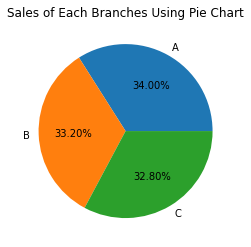

In [32]:
#Visualization
#pie chart
plt.pie(Branch["Branch"], labels = Branch["index"], autopct='%.2f%%')
plt.title("Sales of Each Branches Using Pie Chart")
plt.show()

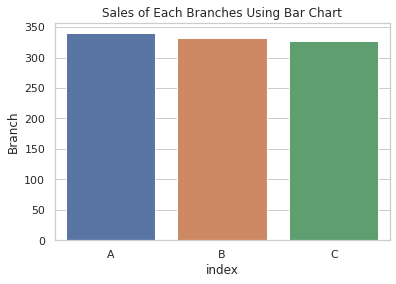

In [42]:
#vertical bar chart
vbar = sns.barplot(x='index', y='Branch', data=Branch)
plt.title("Sales of Each Branches Using Bar Chart")
plt.show()

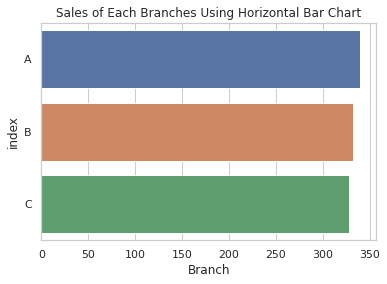

In [56]:
#horizontal bar chart -> switch the x and y
hbar = sns.barplot(x='Branch', y='index', data=Branch)
plt.title("Sales of Each Branches Using Horizontal Bar Chart")
plt.show()

Branch A has the largest percentage, although the difference with Branch B and C is not too big.

##2. Sales by Product Type

In [55]:
#grouping df by Product line
Product = df.groupby("Product line").size().to_frame(name="count").reset_index()
Product

,Product line,count
0,Electronic accessories,170
1,Fashion accessories,178
2,Food and beverages,174
3,Health and beauty,152
4,Home and lifestyle,160
5,Sports and travel,166


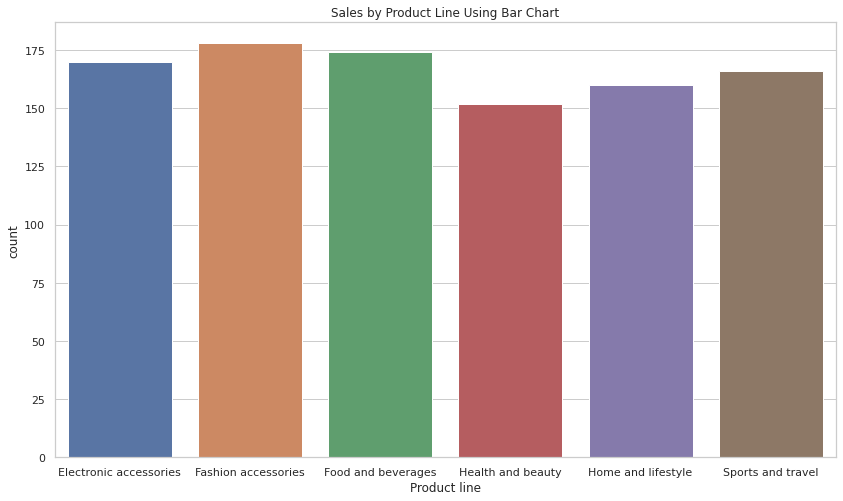

In [66]:
#visualization
plt.figure(figsize=(14,8))
sns.barplot(x="Product line", y="count", data=Product)
plt.title("Sales by Product Line Using Bar Chart")
plt.show()

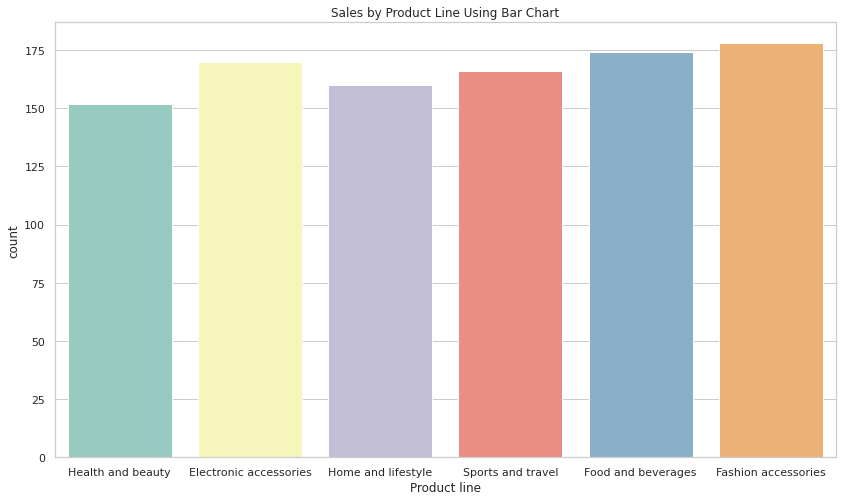

In [65]:
#Create bar chart using countplot seaborn -> the different is can use only the x parameter, but for the data using the initial dataframe)
#visualitzation
plt.figure(figsize=(14,8))
sns.countplot(x="Product line", data=df, palette="Set3")
plt.title("Sales by Product Line Using Bar Chart")
plt.show()

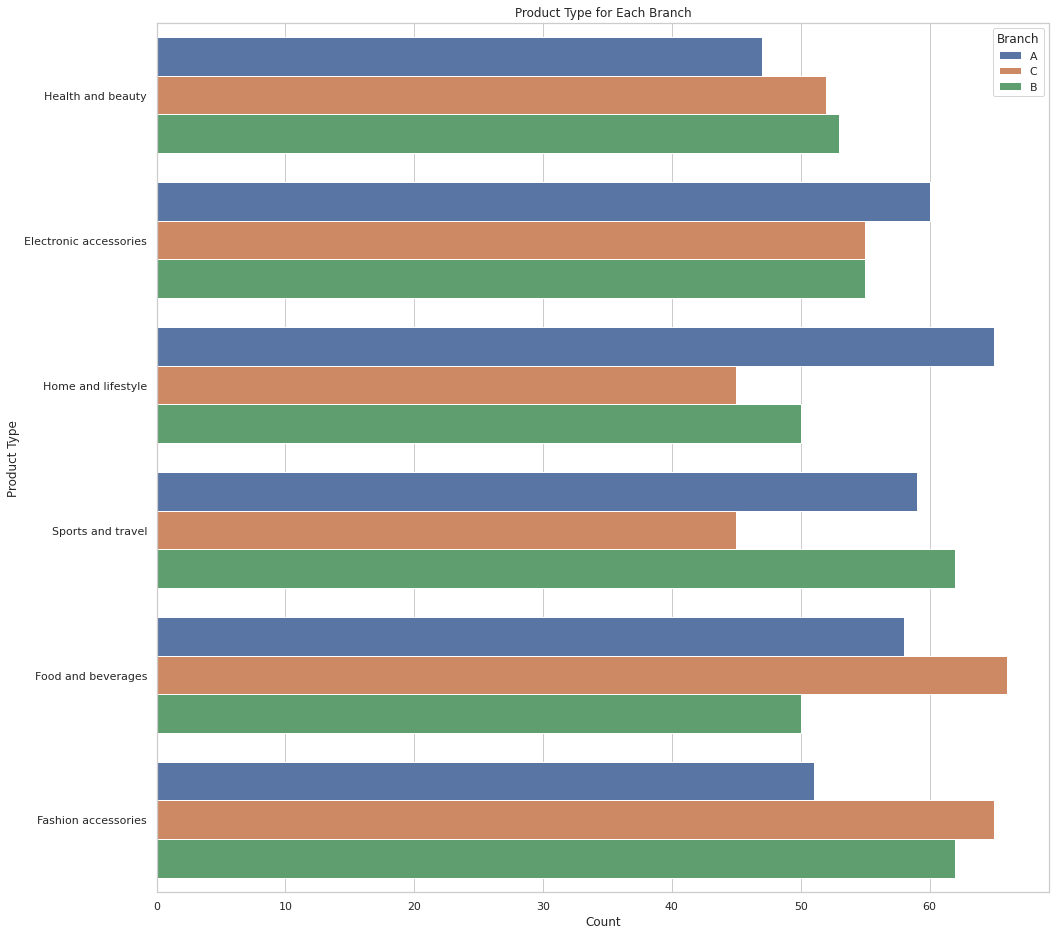

In [81]:
plt.figure(figsize=(16,16))
sns.countplot(y="Product line", data=df, hue="Branch")
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.title("Product Type for Each Branch")
plt.show()

Sales of fashion accessories are the best-selling types of products in supermarkets, and Branch C products are the most sold for the type of fashion accessory products.

##3. Gross income in certain date range

In [111]:
#grouping the gross income by Date
dates = df[["Date", "gross income"]].groupby("Date").sum()
dates[-20:]

,gross income
Date,
2019-03-11,141.0120
2019-03-12,175.1215
2019-03-13,98.2670
2019-03-14,343.5540
2019-03-15,140.1150
2019-03-16,150.2130
2019-03-17,94.1090
2019-03-18,61.5635
2019-03-19,273.3520


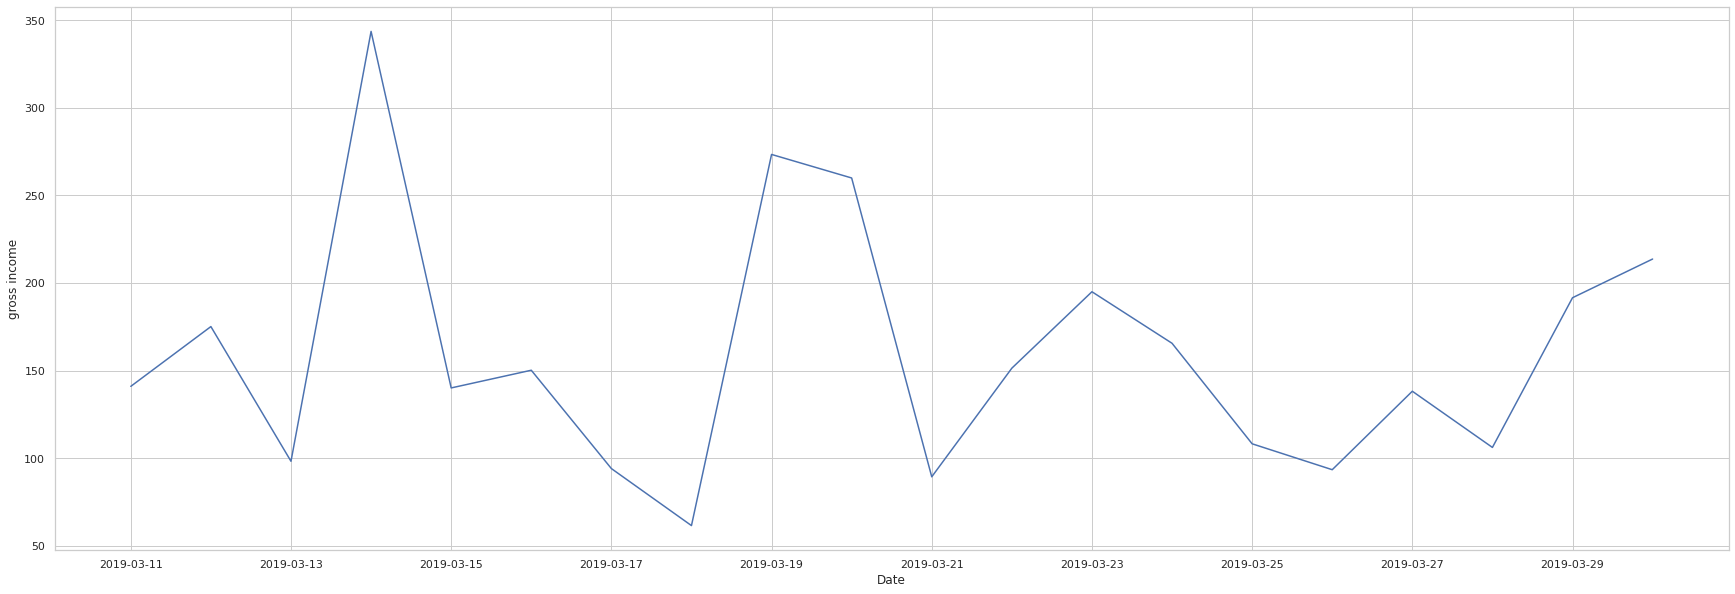

In [109]:
#visualization of the last 20 dates
plt.figure(figsize=(30,10))
sns.lineplot(data=dates[-20:], x="Date", y="gross income")

From the last 20 days, the highest gross income was obtained on 2019-03-14, while the lowest gross income occurred on 2019-03-18.

##4. Is there any relationship between Rating and Total Sales?

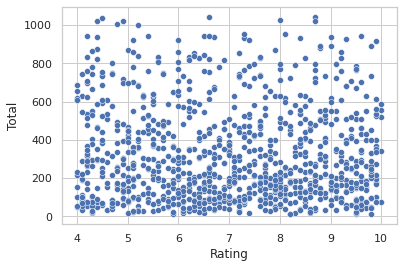

In [110]:
sns.scatterplot(data=df, x="Rating", y="Total")

Answer: There is no relation between Rating and Total Sales of Supermarket Sales